In [22]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import pickle

In [2]:
df=pd.read_csv('Diabetestype.csv')
df

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Type,Class
0,50,6.8,8.8,11.2,7.2,62,Type1,1
1,31,5.2,6.8,10.9,4.2,33,Normal,0
2,32,6.8,8.8,11.2,7.2,62,Type1,1
3,21,5.7,5.8,10.7,4.8,49,Normal,0
4,33,6.8,8.8,11.2,7.2,62,Type1,1
...,...,...,...,...,...,...,...,...
1004,37,0.0,5.6,10.2,5.4,32,Normal,0
1005,23,6.3,4.2,12.2,7.8,57,Type2,1
1006,37,32.0,7.4,8.7,5.6,41,Normal,0
1007,46,19.0,6.3,7.9,3.9,40,Normal,0


In [3]:
df.columns

Index(['Age', 'BS Fast', 'BS pp', 'Plasma R', 'Plasma F', 'HbA1c', 'Type',
       'Class'],
      dtype='object')

In [4]:
df.isnull().sum()

Age         0
BS Fast     0
BS pp       0
Plasma R    0
Plasma F    0
HbA1c       0
Type        0
Class       0
dtype: int64

<AxesSubplot:>

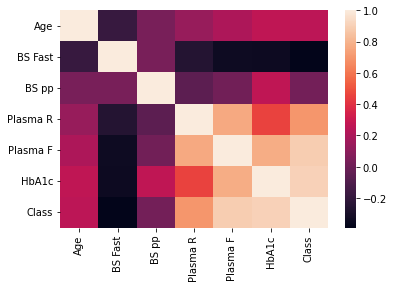

In [5]:
temp = df.corr()
sns.heatmap(temp)

In [6]:
df.dtypes

Age           int64
BS Fast     float64
BS pp       float64
Plasma R    float64
Plasma F    float64
HbA1c         int64
Type         object
Class         int64
dtype: object

In [7]:
df=df.drop('Class',axis=1)

In [8]:
label_encoder = LabelEncoder()

# Fit and transform the 'Color' column using the LabelEncoder
df['Diabetes_type'] = label_encoder.fit_transform(df['Type'])


In [9]:
df

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Type,Diabetes_type
0,50,6.8,8.8,11.2,7.2,62,Type1,1
1,31,5.2,6.8,10.9,4.2,33,Normal,0
2,32,6.8,8.8,11.2,7.2,62,Type1,1
3,21,5.7,5.8,10.7,4.8,49,Normal,0
4,33,6.8,8.8,11.2,7.2,62,Type1,1
...,...,...,...,...,...,...,...,...
1004,37,0.0,5.6,10.2,5.4,32,Normal,0
1005,23,6.3,4.2,12.2,7.8,57,Type2,2
1006,37,32.0,7.4,8.7,5.6,41,Normal,0
1007,46,19.0,6.3,7.9,3.9,40,Normal,0


In [10]:
df=df.drop('Type',axis=1)

Label Encoder [ Type 1 ->1  ,Normal -> 0,Type 2 -> 2]

In [11]:
for x in df:
    print(f'column {x} quantile 75 : {df[x].quantile(0.75)},quntile 90 : {df[x].quantile(0.90)}, quntile 99 : {df[x].quantile(0.99)}')

column Age quantile 75 : 41.0,quntile 90 : 51.0, quntile 99 : 66.0
column BS Fast quantile 75 : 20.0,quntile 90 : 32.0, quntile 99 : 46.91999999999996
column BS pp quantile 75 : 7.7,quntile 90 : 8.2, quntile 99 : 8.8
column Plasma R quantile 75 : 11.4,quntile 90 : 12.6, quntile 99 : 13.1
column Plasma F quantile 75 : 7.8,quntile 90 : 8.4, quntile 99 : 9.1
column HbA1c quantile 75 : 53.0,quntile 90 : 62.0, quntile 99 : 69.0
column Diabetes_type quantile 75 : 1.0,quntile 90 : 2.0, quntile 99 : 2.0


In [12]:
for y in df:
    print(f'maximum value of column {y} : {max(df[y])}')

maximum value of column Age : 81
maximum value of column BS Fast : 54.0
maximum value of column BS pp : 8.8
maximum value of column Plasma R : 13.1
maximum value of column Plasma F : 9.1
maximum value of column HbA1c : 69
maximum value of column Diabetes_type : 2


In [13]:
X= df.drop('Diabetes_type',axis=1)
y=df['Diabetes_type']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 1.0
Confusion Matrix:
[[133   0   0]
 [  0  38   0]
 [  0   0  31]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        31

    accuracy                           1.00       202
   macro avg       1.00      1.00      1.00       202
weighted avg       1.00      1.00      1.00       202



In [39]:
num_folds = 5
cv_scores = cross_val_score(clf, X, y, cv=num_folds)

# Print the cross-validation scores for each fold
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)
print("Mean Cross-validation score:", mean_cv_score)
print("Standard Deviation of Cross-validation scores:", std_cv_score)

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean Cross-validation score: 1.0
Standard Deviation of Cross-validation scores: 0.0


In [21]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 1.0
Confusion Matrix:
[[133   0   0]
 [  0  38   0]
 [  0   0  31]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        31

    accuracy                           1.00       202
   macro avg       1.00      1.00      1.00       202
weighted avg       1.00      1.00      1.00       202



In [23]:
model_filename = 'diabetes_type1_type2.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf_classifier, file)

In [43]:
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize the AdaBoostClassifier with 100 estimators (weak learners)
adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Fit the classifier to the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0
